In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import combinations
from scipy.stats import pearsonr

# Negative Transfer
- Load results
- Plot heatmaps for pairwise accuracy
- Correlate pairwise accuracy matrices

In [2]:
p_mlp_single = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/baseline/mlp'
p_mlp_pairs = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/pairs/mlp'

p_cnn_single = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/baseline/cnn'
p_cnn_pairs = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/pairs/cnn'

p_concat_single = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/baseline/concat'
p_concat_pairs = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/pairs/concat'

p_deeper_single = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/baseline/deeper'
p_deeper_pairs = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/pairs/deeper'

p_mps_big_single = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/baseline/mps_big'
p_mps_big_pairs = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/pairs/mps_big'

cases = ['DUP1q21_1',
        'DEL1q21_1',
        'DUP22q11_2',
        'DUP16p11_2',
        'DEL16p11_2',
        'DEL22q11_2',
        'DEL15q11_2',
        'ASD',
        'ADHD',
        'SZ',
        'BIP']

labels = ['DUP 1q21.1',
        'DEL 1q21.1',
        'DUP 22q11.2',
        'DUP 16p11.2',
        'DEL 16p11.2',
        'DEL 22q11.2',
        'DEL 15q11.2',
        'ASD',
        'ADHD',
        'SZ',
        'BIP']

case_to_idx = dict(zip(cases,range(len(cases))))

pairs = [combo for combo in combinations(cases,2)]

# MLP
## Load Single Task Results

In [3]:
mlp_single = np.zeros(len(cases))
for case in cases:
    p = os.path.join(p_mlp_single,f'{case}')
    final_acc = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        final_acc.append(df['Accuracy/test'].iloc[-1])
    mlp_single[case_to_idx[case]] = np.mean(final_acc)

## Load Pair Results

In [4]:
mlp_pairs = np.zeros((len(cases),len(cases)))
for i in range(1,len(pairs)+1):
    p = os.path.join(p_mlp_pairs,f'pair_{i}')
    p_fold = os.path.join(p,'fold_0')
    case1 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[2]
    case2 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[3]
    final_acc_case1 = []
    final_acc_case2 = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p_fold,file),index_col=0,header=[0,1])
        final_acc_case1.append(df[case1]['Accuracy/test'].iloc[-1])
        final_acc_case2.append(df[case2]['Accuracy/test'].iloc[-1])
    
    # case1, case2: accuracy of case1 trained with case2
    mlp_pairs[case_to_idx[case1],case_to_idx[case2]] = np.mean(final_acc_case1)
    mlp_pairs[case_to_idx[case2],case_to_idx[case1]] = np.mean(final_acc_case2)

np.fill_diagonal(mlp_pairs,mlp_single)

# CNN
## Load Single Task Results

In [5]:
cnn_single = np.zeros(len(cases))
for case in cases:
    p = os.path.join(p_cnn_single,f'{case}')
    final_acc = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        final_acc.append(df['Accuracy/test'].iloc[-1])
    cnn_single[case_to_idx[case]] = np.mean(final_acc)


## Load Pair Results

In [6]:
cnn_pairs = np.zeros((len(cases),len(cases)))
for i in range(1,len(pairs)+1):
    p = os.path.join(p_cnn_pairs,f'pair_{i}')
    p_fold = os.path.join(p,'fold_0')
    case1 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[2]
    case2 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[3]
    final_acc_case1 = []
    final_acc_case2 = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        files = [f for f in os.listdir(p_fold) if f[-4:]=='.csv']
        file = files[0]
        df = pd.read_csv(os.path.join(p_fold,file),index_col=0,header=[0,1])
        final_acc_case1.append(df[case1]['Accuracy/test'].iloc[-1])
        final_acc_case2.append(df[case2]['Accuracy/test'].iloc[-1])
    
    # case1, case2: accuracy of case1 trained with case2
    cnn_pairs[case_to_idx[case1],case_to_idx[case2]] = np.mean(final_acc_case1)
    cnn_pairs[case_to_idx[case2],case_to_idx[case1]] = np.mean(final_acc_case2)

np.fill_diagonal(cnn_pairs,cnn_single)

# Concat
## Load Single Task Results

In [7]:
concat_single = np.zeros(len(cases))
for case in cases:
    p = os.path.join(p_concat_single,f'{case}')
    final_acc = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        final_acc.append(df['Accuracy/test'].iloc[-1])
    concat_single[case_to_idx[case]] = np.mean(final_acc)

## Load Pair Results

In [8]:
concat_pairs = np.zeros((len(cases),len(cases)))
for i in range(1,len(pairs)+1):
    p = os.path.join(p_concat_pairs,f'pair_{i}')
    p_fold = os.path.join(p,'fold_0')
    case1 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[2]
    case2 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[3]
    final_acc_case1 = []
    final_acc_case2 = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        if os.path.exists(p_fold):
            files = [f for f in os.listdir(p_fold) if f[-4:]=='.csv']
            if len(files) != 0:
                file = files[0]
                df = pd.read_csv(os.path.join(p_fold,file),index_col=0,header=[0,1])
                final_acc_case1.append(df[case1]['Accuracy/test'].iloc[-1])
                final_acc_case2.append(df[case2]['Accuracy/test'].iloc[-1])
            else:
                print(f"{case1} {case2} {i}")
        else:
                print(f"{case1} {case2} {i}")
    
    # case1, case2: accuracy of case1 trained with case2
    concat_pairs[case_to_idx[case1],case_to_idx[case2]] = np.mean(final_acc_case1)
    concat_pairs[case_to_idx[case2],case_to_idx[case1]] = np.mean(final_acc_case2)

np.fill_diagonal(concat_pairs,concat_single)

# Deeper
# Load Single Task Results

In [9]:
deeper_single = np.zeros(len(cases))
for case in cases:
    p = os.path.join(p_deeper_single,f'{case}')
    final_acc = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        final_acc.append(df['Accuracy/test'].iloc[-1])

    deeper_single[case_to_idx[case]] = np.mean(final_acc)

## Load Pair Results

In [10]:
deeper_pairs = np.zeros((len(cases),len(cases)))
for i in range(1,len(pairs)+1):
    p = os.path.join(p_deeper_pairs,f'pair_{i}')
    p_fold = os.path.join(p,'fold_0')
    case1 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[2]
    case2 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[3]
    final_acc_case1 = []
    final_acc_case2 = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        if os.path.exists(p_fold):
            files = [f for f in os.listdir(p_fold) if f[-4:]=='.csv']
            if len(files) != 0:
                file = files[0]
                df = pd.read_csv(os.path.join(p_fold,file),index_col=0,header=[0,1])
                final_acc_case1.append(df[case1]['Accuracy/test'].iloc[-1])
                final_acc_case2.append(df[case2]['Accuracy/test'].iloc[-1])
            else:
                print(f"{case1} {case2} {i}")
        else:
            print(f"{case1} {case2} {i}")
    
    # case1, case2: accuracy of case1 trained with case2
    deeper_pairs[case_to_idx[case1],case_to_idx[case2]] = np.mean(final_acc_case1)
    deeper_pairs[case_to_idx[case2],case_to_idx[case1]] = np.mean(final_acc_case2)

np.fill_diagonal(deeper_pairs,deeper_single)

# MPS_BIG
# Load Single Task Results

In [11]:
mps_big_single = np.zeros(len(cases))
for case in cases:
    p = os.path.join(p_mps_big_single,f'{case}')
    final_acc = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        final_acc.append(df['Accuracy/test'].iloc[-1])

    mps_big_single[case_to_idx[case]] = np.mean(final_acc)

## Load Pair Results

In [12]:
mps_big_pairs = np.zeros((len(cases),len(cases)))
for i in range(1,len(pairs)+1):
    p = os.path.join(p_mps_big_pairs,f'pair_{i}')
    p_fold = os.path.join(p,'fold_0')
    case1 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[2]
    case2 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[3]
    final_acc_case1 = []
    final_acc_case2 = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        if os.path.exists(p_fold):
            files = [f for f in os.listdir(p_fold) if f[-4:]=='.csv']
            if len(files) != 0:
                file = files[0]
                df = pd.read_csv(os.path.join(p_fold,file),index_col=0,header=[0,1])
                final_acc_case1.append(df[case1]['Accuracy/test'].iloc[-1])
                final_acc_case2.append(df[case2]['Accuracy/test'].iloc[-1])
            else:
                print(f"{case1} {case2} {i}")
        else:
            print(f"{case1} {case2} {i}")
    
    # case1, case2: accuracy of case1 trained with case2
    mps_big_pairs[case_to_idx[case1],case_to_idx[case2]] = np.mean(final_acc_case1)
    mps_big_pairs[case_to_idx[case2],case_to_idx[case1]] = np.mean(final_acc_case2)

np.fill_diagonal(mps_big_pairs,mps_big_single)

In [13]:
mlp_pairs = pd.DataFrame(mlp_pairs,index=cases,columns=cases)
cnn_pairs = pd.DataFrame(cnn_pairs,index=cases,columns=cases)
concat_pairs = pd.DataFrame(concat_pairs,index=cases,columns=cases)
deeper_pairs = pd.DataFrame(deeper_pairs,index=cases,columns=cases)
mps_big_pairs = pd.DataFrame(mps_big_pairs,index=cases,columns=cases)

# Compare

In [14]:
mlp_diff = (mlp_pairs.transpose() - mlp_single).transpose()
concat_diff = (concat_pairs.transpose() - concat_single).transpose()
deeper_diff = (deeper_pairs.transpose() - deeper_single).transpose()
cnn_diff = (cnn_pairs.transpose() - cnn_single).transpose()
mps_big_diff = (mps_big_pairs.transpose() - mps_big_single).transpose()

#np.save('./results_paper/neg_transfer/figures/mlp_diff.npy',mlp_diff)
#np.save('./results_paper/neg_transfer/figures/cnn_diff.npy',cnn_diff)
#np.save('./results_paper/neg_transfer/figures/concat_diff.npy',concat_diff)
#np.save('./results_paper/neg_transfer/figures/deeper_diff.npy',deeper_diff)
#np.save('./results_paper/neg_transfer/figures/mps_diff.npy',mps_diff)
#np.save('./results_paper/neg_transfer/figures/mps_big_diff.npy',mps_big_diff)

# Cluster

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

mlp_dist = mlp_diff.max() - mlp_diff
#deeper_dist = deeper_diff.max() - deeper_diff
#concat_dist = concat_diff.max() - concat_diff
#cnn_dist = cnn_diff.max() - cnn_diff
#mps_big_dist = mps_big_diff.max() - mps_big_diff

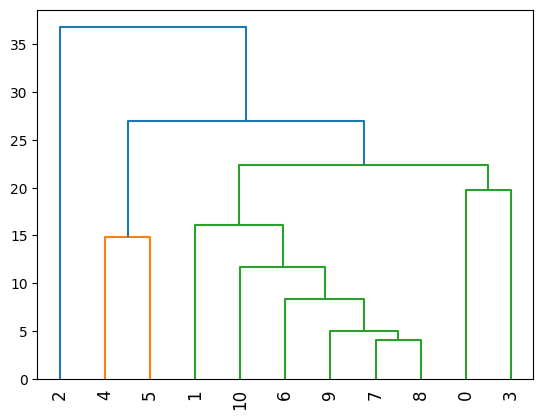

In [19]:
Z_mlp = linkage(mlp_dist, 'complete')
#Z_concat = linkage(concat_dist, 'complete')
#Z_deeper = linkage(deeper_dist, 'complete')
#Z_cnn = linkage(cnn_dist, 'complete')
#Z_mps_big = linkage(mps_big_dist, 'complete')

dendrogram(Z_mlp, orientation='top', leaf_rotation=90)
plt.show()
#dendrogram(Z_concat, labels=labels, orientation='top', leaf_rotation=90)
#plt.show()
#dendrogram(Z_deeper, labels=labels, orientation='top', leaf_rotation=90)
#plt.show()
#dendrogram(Z_cnn, labels=labels, orientation='top', leaf_rotation=90)
#plt.show()
#dendrogram(Z_mps_big, labels=labels, orientation='top', leaf_rotation=90)
#plt.show()

In [20]:
# Clusterize the data
threshold = 0.8
clabels_mlp = fcluster(Z_mlp, threshold, criterion='distance')
#clabels_concat = fcluster(Z_concat, threshold, criterion='distance')
#clabels_deeper = fcluster(Z_deeper, threshold, criterion='distance')
#clabels_cnn = fcluster(Z_cnn, threshold, criterion='distance')
#clabels_mps_big = fcluster(Z_mps_big, threshold, criterion='distance')

# Plot

## Raw

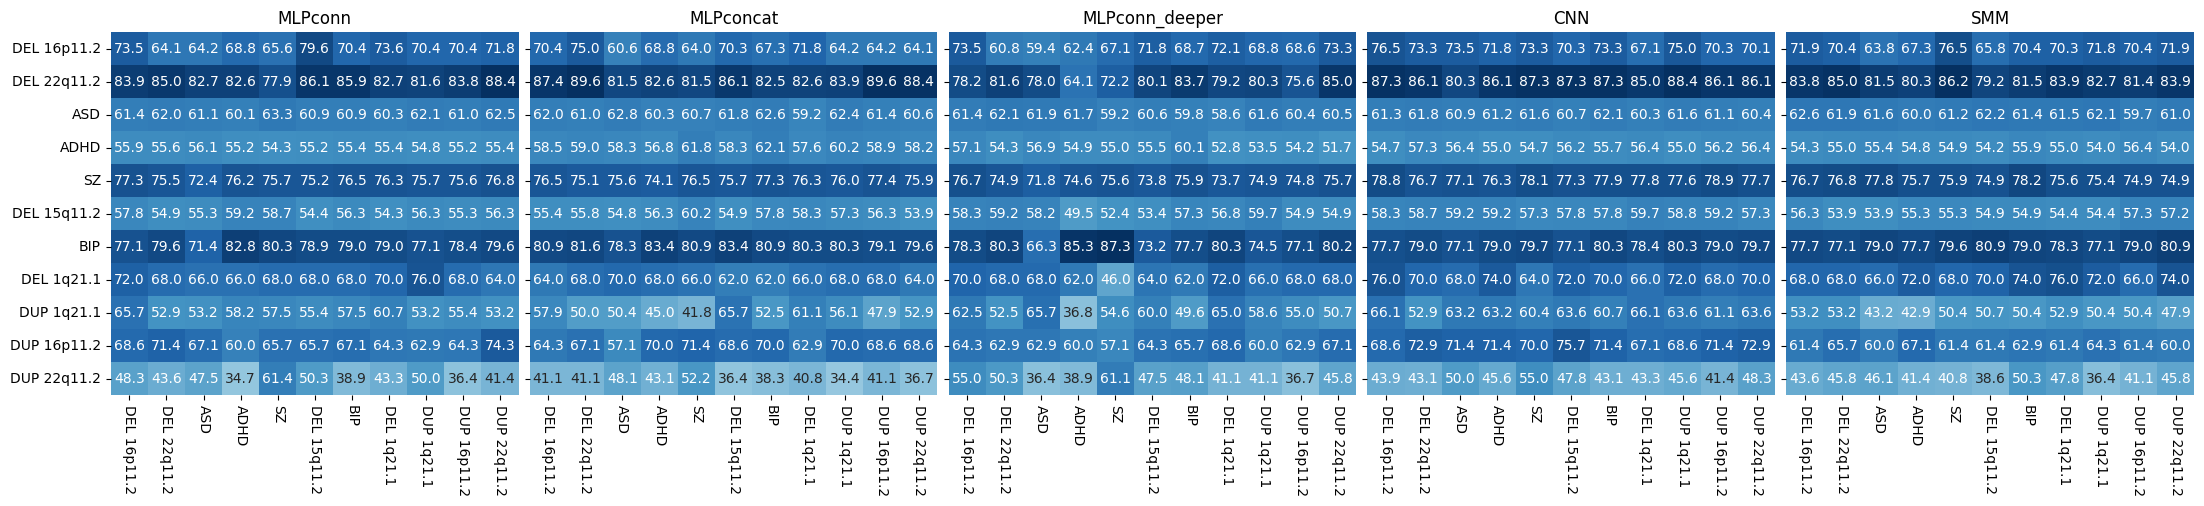

In [21]:
fig,ax = plt.subplots(1,5,figsize=(22,5),sharex=True,sharey=True)

clabels_mlp_order = [cases[i] for i in np.argsort(clabels_mlp)]
labels_mlp_order = [labels[i] for i in np.argsort(clabels_mlp)]

sns.heatmap(mlp_pairs.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[0],center=0,fmt='.1f')
sns.heatmap(concat_pairs.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[1],center=0,fmt='.1f')
sns.heatmap(deeper_pairs.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[2],center=0,fmt='.1f')
sns.heatmap(cnn_pairs.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[3],center=0,fmt='.1f')
sns.heatmap(mps_big_pairs.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[4],center=0,fmt='.1f')
ax[0].set_title('MLPconn')
ax[1].set_title('MLPconcat')
ax[2].set_title('MLPconn_deeper')
ax[3].set_title('CNN')
ax[4].set_title('SMM')

ax[0].set_yticklabels(labels_mlp_order)
ax[0].set_xticklabels(labels_mlp_order,rotation=270)
ax[1].set_xticklabels(labels_mlp_order,rotation=270)
ax[2].set_xticklabels(labels_mlp_order,rotation=270)
ax[3].set_xticklabels(labels_mlp_order,rotation=270)
ax[4].set_xticklabels(labels_mlp_order,rotation=270)

plt.tight_layout(pad=0.5)
plt.savefig('./results_paper/pairs/figures/quint_comparison_raw.png',dpi=300)

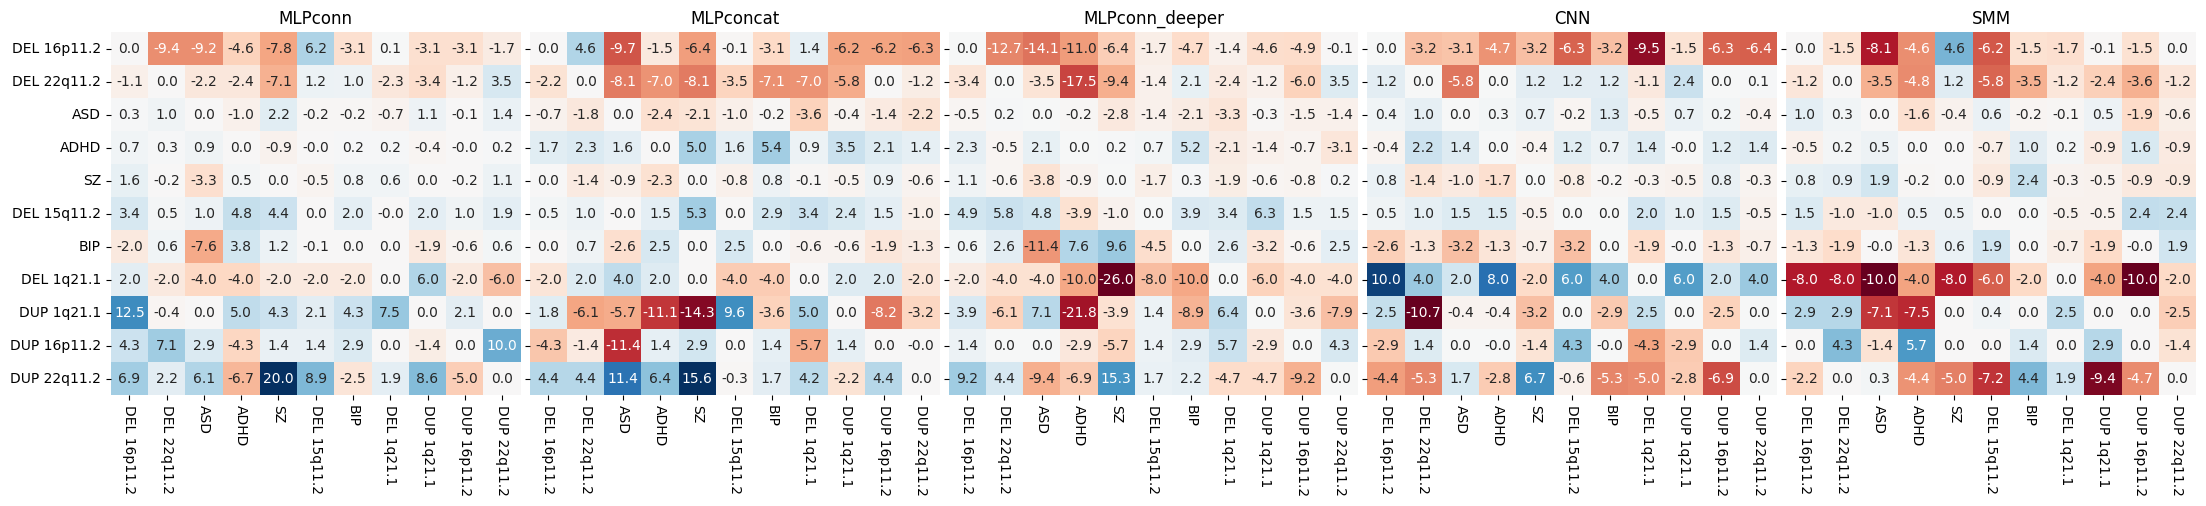

In [22]:
fig,ax = plt.subplots(1,5,figsize=(22,5),sharex=True,sharey=True)

clabels_mlp_order = [cases[i] for i in np.argsort(clabels_mlp)]
labels_mlp_order = [labels[i] for i in np.argsort(clabels_mlp)]

sns.heatmap(mlp_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[0],center=0,fmt='.1f')
sns.heatmap(concat_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[1],center=0,fmt='.1f')
sns.heatmap(deeper_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[2],center=0,fmt='.1f')
sns.heatmap(cnn_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[3],center=0,fmt='.1f')
sns.heatmap(mps_big_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[4],center=0,fmt='.1f')
ax[0].set_title('MLPconn')
ax[1].set_title('MLPconcat')
ax[2].set_title('MLPconn_deeper')
ax[3].set_title('CNN')
ax[4].set_title('SMM')

ax[0].set_yticklabels(labels_mlp_order)
ax[0].set_xticklabels(labels_mlp_order,rotation=270)
ax[1].set_xticklabels(labels_mlp_order,rotation=270)
ax[2].set_xticklabels(labels_mlp_order,rotation=270)
ax[3].set_xticklabels(labels_mlp_order,rotation=270)
ax[4].set_xticklabels(labels_mlp_order,rotation=270)

plt.tight_layout(pad=0.5)
plt.savefig('./results_paper/pairs/figures/quint_comparison.png',dpi=300)

# Overall gains

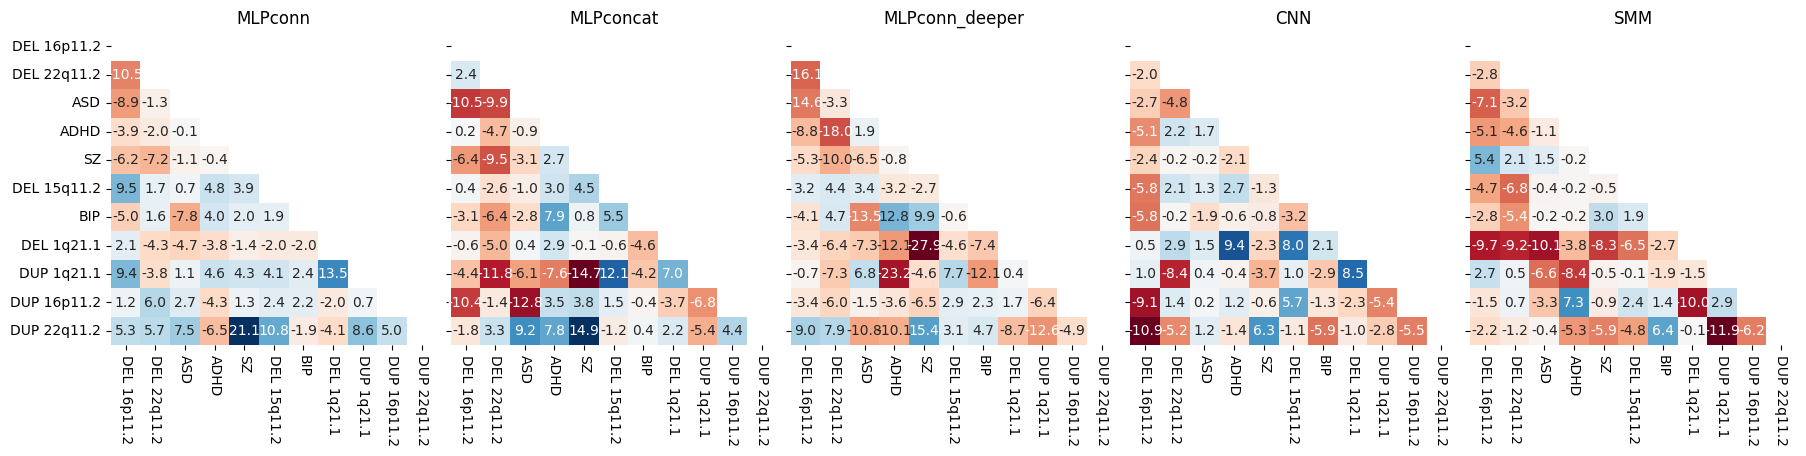

In [23]:
fig,ax = plt.subplots(1,5,figsize=(18,4.5),sharey=True,sharex=True)
sns.heatmap(mlp_diff.loc[clabels_mlp_order,clabels_mlp_order] + mlp_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[0],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))
sns.heatmap(concat_diff.loc[clabels_mlp_order,clabels_mlp_order] + concat_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[1],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))
sns.heatmap(deeper_diff.loc[clabels_mlp_order,clabels_mlp_order] + deeper_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[2],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))
sns.heatmap(cnn_diff.loc[clabels_mlp_order,clabels_mlp_order] + cnn_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[3],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))
sns.heatmap(mps_big_diff.loc[clabels_mlp_order,clabels_mlp_order] + mps_big_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[4],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))
ax[0].set_title('MLPconn')
ax[1].set_title('MLPconcat')
ax[2].set_title('MLPconn_deeper')
ax[3].set_title('CNN')
ax[4].set_title('SMM')

ax[0].set_yticklabels(labels_mlp_order)
ax[0].set_xticklabels(labels_mlp_order,rotation=270)
ax[1].set_xticklabels(labels_mlp_order,rotation=270)
ax[2].set_xticklabels(labels_mlp_order,rotation=270)
ax[3].set_xticklabels(labels_mlp_order,rotation=270)
ax[4].set_xticklabels(labels_mlp_order,rotation=270)

plt.tight_layout(pad=0.5)
plt.savefig('./results_paper/pairs/figures/quint_gains.png',dpi=300)

# Combined plot

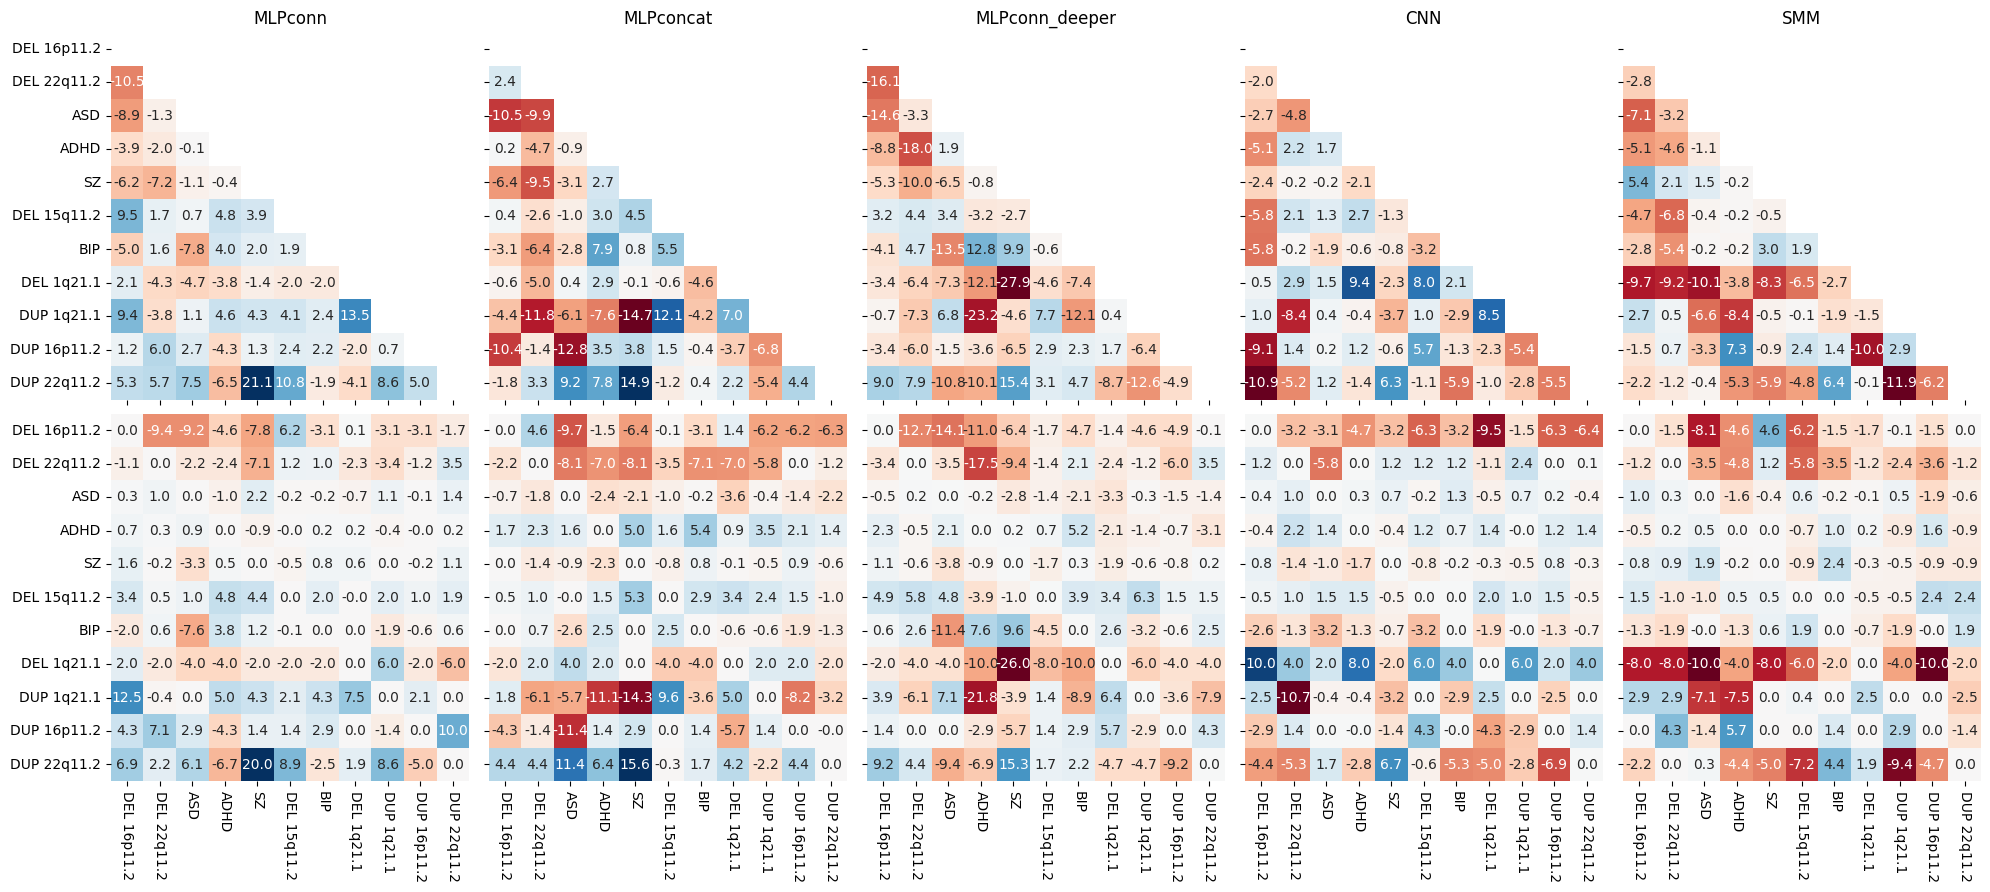

In [24]:
fig,ax = plt.subplots(2,5,figsize=(20,9),sharey=True,sharex=True)

# Pair Gains
sns.heatmap(mlp_diff.loc[clabels_mlp_order,clabels_mlp_order] + mlp_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[0,0],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))
sns.heatmap(concat_diff.loc[clabels_mlp_order,clabels_mlp_order] + concat_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[0,1],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))
sns.heatmap(deeper_diff.loc[clabels_mlp_order,clabels_mlp_order] + deeper_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[0,2],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))
sns.heatmap(cnn_diff.loc[clabels_mlp_order,clabels_mlp_order] + cnn_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[0,3],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))
sns.heatmap(mps_big_diff.loc[clabels_mlp_order,clabels_mlp_order] + mps_big_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[0,4],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))

# Full pairwise
sns.heatmap(mlp_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[1,0],center=0,fmt='.1f')
sns.heatmap(concat_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[1,1],center=0,fmt='.1f')
sns.heatmap(deeper_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[1,2],center=0,fmt='.1f')
sns.heatmap(cnn_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[1,3],center=0,fmt='.1f')
sns.heatmap(mps_big_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[1,4],center=0,fmt='.1f')

ax[0,0].set_title('MLPconn')
ax[0,1].set_title('MLPconcat')
ax[0,2].set_title('MLPconn_deeper')
ax[0,3].set_title('CNN')
ax[0,4].set_title('SMM')

ax[1,0].set_xticklabels(labels,rotation=270)
ax[1,1].set_xticklabels(labels,rotation=270)
ax[1,2].set_xticklabels(labels,rotation=270)
ax[1,3].set_xticklabels(labels,rotation=270)
ax[1,4].set_xticklabels(labels,rotation=270)

ax[0,0].set_yticklabels(labels_mlp_order)
ax[1,0].set_yticklabels(labels_mlp_order)
ax[1,0].set_xticklabels(labels_mlp_order,rotation=270)
ax[1,1].set_xticklabels(labels_mlp_order,rotation=270)
ax[1,2].set_xticklabels(labels_mlp_order,rotation=270)
ax[1,3].set_xticklabels(labels_mlp_order,rotation=270)
ax[1,4].set_xticklabels(labels_mlp_order,rotation=270)
plt.tight_layout(pad=1)
plt.savefig('./results_paper/pairs/figures/quint_two_row_comparison.png',dpi=300)

# Mega combo plot

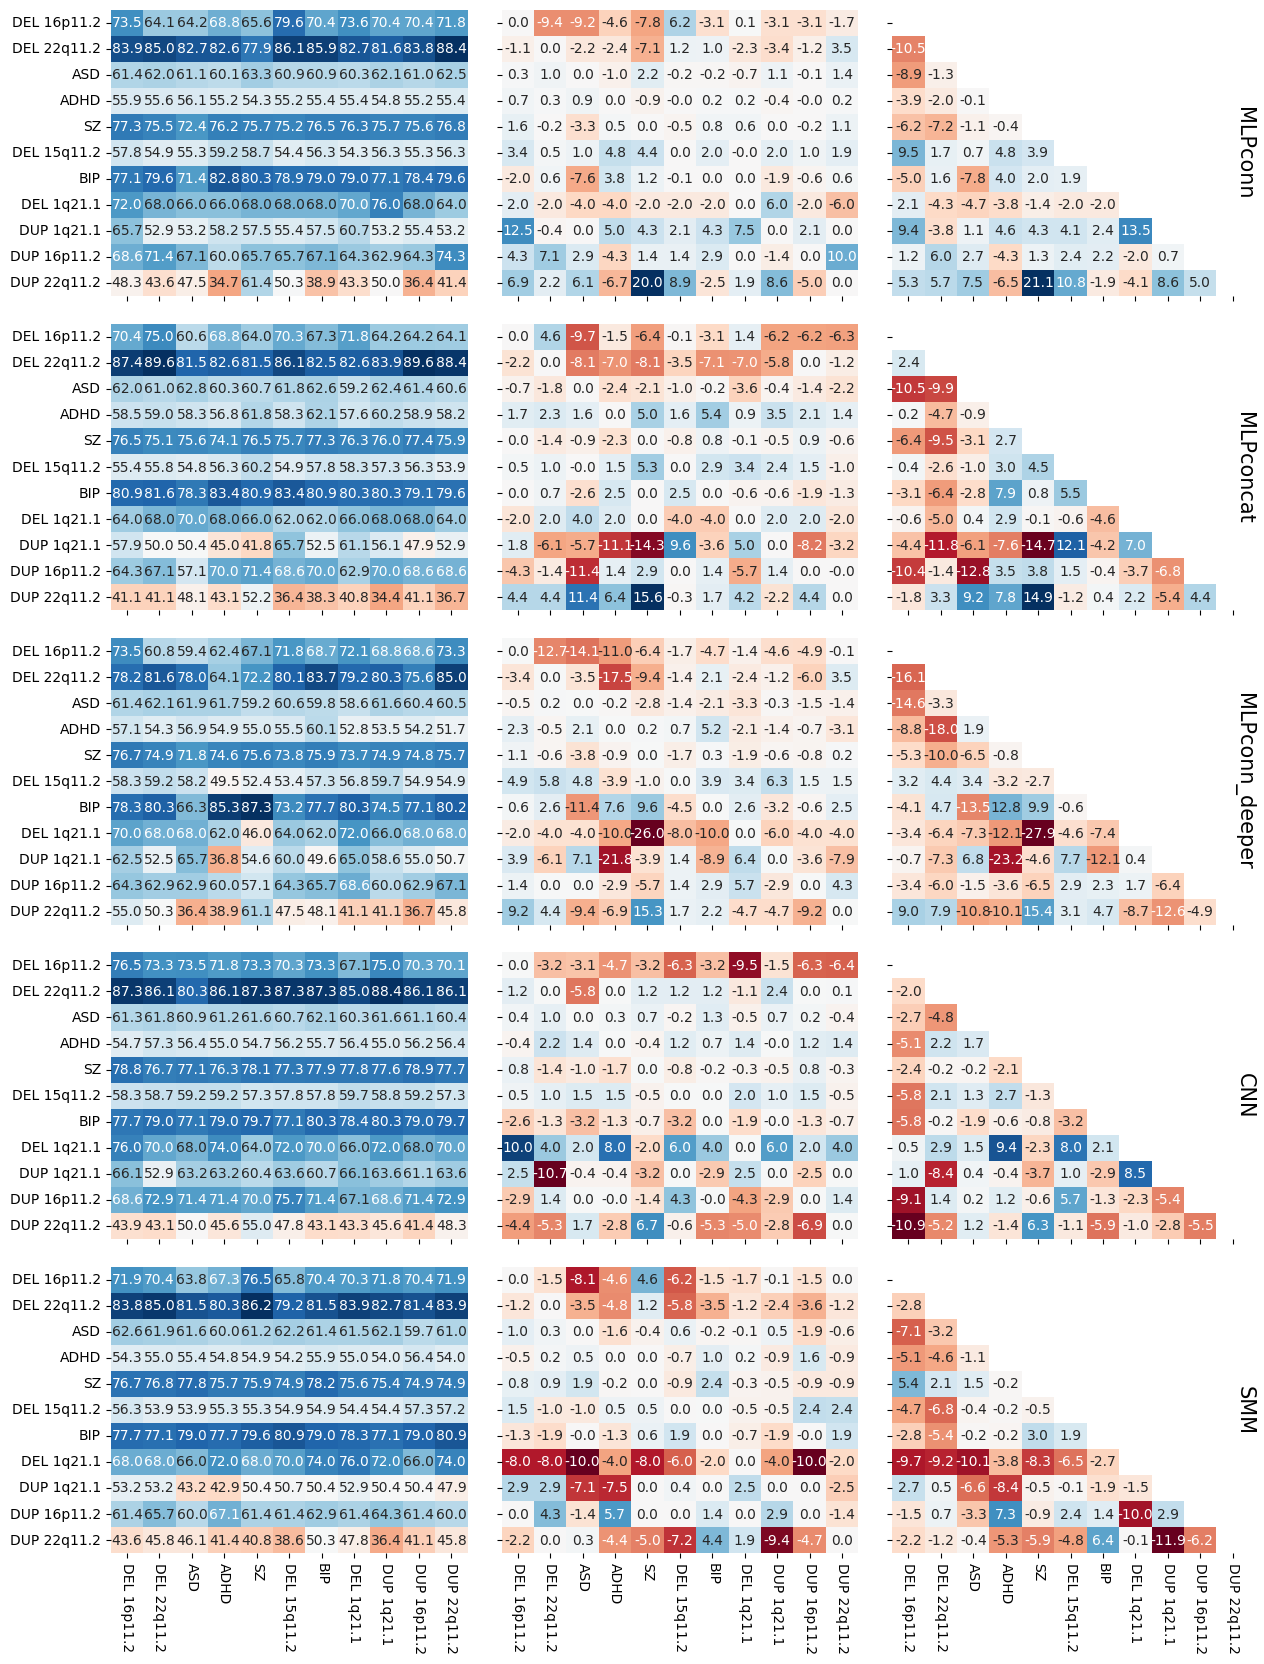

In [51]:
fig,ax = plt.subplots(5,3,figsize=(13,17),sharey=True,sharex=True)

# Pair Gains
sns.heatmap(mlp_diff.loc[clabels_mlp_order,clabels_mlp_order] + mlp_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[0,2],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))
sns.heatmap(concat_diff.loc[clabels_mlp_order,clabels_mlp_order] + concat_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[1,2],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))
sns.heatmap(deeper_diff.loc[clabels_mlp_order,clabels_mlp_order] + deeper_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[2,2],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))
sns.heatmap(cnn_diff.loc[clabels_mlp_order,clabels_mlp_order] + cnn_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[3,2],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))
sns.heatmap(mps_big_diff.loc[clabels_mlp_order,clabels_mlp_order] + mps_big_diff.loc[clabels_mlp_order,clabels_mlp_order].transpose(),
            annot=True,cmap='RdBu',cbar=False,ax=ax[4,2],center=0,fmt='.1f',mask = np.triu(np.ones((11,11))))

# pairwise diff
sns.heatmap(mlp_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[0,1],center=0,fmt='.1f')
sns.heatmap(concat_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[1,1],center=0,fmt='.1f')
sns.heatmap(deeper_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[2,1],center=0,fmt='.1f')
sns.heatmap(cnn_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[3,1],center=0,fmt='.1f')
sns.heatmap(mps_big_diff.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[4,1],center=0,fmt='.1f')

# pairwise raw
sns.heatmap(mlp_pairs.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[0,0],center=50,fmt='.1f')
sns.heatmap(concat_pairs.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[1,0],center=50,fmt='.1f')
sns.heatmap(deeper_pairs.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[2,0],center=50,fmt='.1f')
sns.heatmap(cnn_pairs.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[3,0],center=50,fmt='.1f')
sns.heatmap(mps_big_pairs.loc[clabels_mlp_order,clabels_mlp_order],annot=True,cmap='RdBu',cbar=False,ax=ax[4,0],center=50,fmt='.1f')

#ax[0,0].set_title('Accuracy')
#ax[0,1].set_title('Difference from Baseline')
#ax[0,2].set_title('Pair Gain')

ax[0,2].yaxis.set_label_position("right")
ax[1,2].yaxis.set_label_position("right")
ax[2,2].yaxis.set_label_position("right")
ax[3,2].yaxis.set_label_position("right")
ax[4,2].yaxis.set_label_position("right")

ax[0,2].set_ylabel('MLPconn',size=15,rotation=270)
ax[1,2].set_ylabel('MLPconcat',size=15,rotation=270)
ax[2,2].set_ylabel('MLPconn_deeper',size=15,rotation=270)
ax[3,2].set_ylabel('CNN',size=15,rotation=270)
ax[4,2].set_ylabel('SMM',size=15,rotation=270)

ax[0,0].set_yticklabels(labels_mlp_order)
ax[1,0].set_yticklabels(labels_mlp_order)
ax[2,0].set_yticklabels(labels_mlp_order)
ax[3,0].set_yticklabels(labels_mlp_order)
ax[4,0].set_yticklabels(labels_mlp_order)

ax[4,0].set_xticklabels(labels_mlp_order,rotation=270)
ax[4,1].set_xticklabels(labels_mlp_order,rotation=270)
ax[4,2].set_xticklabels(labels_mlp_order,rotation=270)

#plt.subplots_adjust(hspace=0.1,wspace=0.05)
plt.tight_layout(pad=2)
plt.savefig('./results_paper/pairs/figures/triple_comparison.png',dpi=300)

# Correlate

In [38]:
# MLPconn & MLPconn_deeper
pearsonr(mlp_diff.to_numpy().reshape(-1),deeper_diff.to_numpy().reshape(-1))

PearsonRResult(statistic=0.47923986739122687, pvalue=2.6830649459517003e-08)

In [39]:
# MLPconn & MLPconcat
pearsonr(mlp_diff.to_numpy().reshape(-1),concat_diff.to_numpy().reshape(-1))

PearsonRResult(statistic=0.2890193194727966, pvalue=0.0013039232515141702)

In [40]:
# MLPconn & CNN
pearsonr(mlp_diff.to_numpy().reshape(-1),cnn_diff.to_numpy().reshape(-1))

PearsonRResult(statistic=0.21376080207350476, pvalue=0.018560549097908545)

In [41]:
# MLPconn & MPS
pearsonr(mlp_diff.to_numpy().reshape(-1),mps_big_diff.to_numpy().reshape(-1))

PearsonRResult(statistic=0.014056750715024635, pvalue=0.8783771340089382)